<div class="alert alert-block alert-success">
    
# EDA Projects: Space Missions
    
 👨‍🏫 **David Wood**      
 📅 **[28-Mar-2023]**  
 

</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-Projects:-Space-Missions" data-toc-modified-id="EDA-Projects:-Space-Missions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA Projects: Space Missions</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Import-modules-and-data-👨‍💻" data-toc-modified-id="Import-modules-and-data-👨‍💻-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules and data 👨‍💻</a></span></li><li><span><a href="#Data-Inspection-🔍📊" data-toc-modified-id="Data-Inspection-🔍📊-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Inspection 🔍📊</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Insights-and-Conclusions-🕵️‍♂️" data-toc-modified-id="Insights-and-Conclusions-🕵️‍♂️-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Insights and Conclusions 🕵️‍♂️</a></span></li></ul></div>

<div class="alert alert-block alert-danger">

# Summary
    
🔭🚀🪐 **All space missions from 1957 to August 2022, including details on the location, date, and result of the launch, the company responsible, and the name, price, and status of the rocket used for the mission.** 🔭🚀🪐 <br><br>

*Data Dictionary:*


| Field          | Description                                                                  |
|----------------|------------------------------------------------------------------------------|
| Company	     | Company responsible for the space mission                                    |
| Location	     | Location of the launch                                                       |
| Date	         | Date of the launch                                                           |
| Time	         | Time of the launch (UTC)                                                     |
| Rocket	     | Name of the rocket used for the mission                                      |
| Mission	     | Name of the space mission (or missions)                                      |
| RocketStatus	 | Status of the rocket as of August 2022 (Active or Inactive)                  |
| Price	         | Cost of the rocket in millions of US dollars                                 |
| MissionStatus	 | Status of the mission (Success, Failure, Partial Failure, Prelaunch Failure) |

#  Import modules and data 👨‍💻

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("ggplot") # styling the charts

from datetime import time

In [2]:
import os
os.getcwd()

'/Users/davidwood/Documents/Dave - Mac/Education/Imperial Business Analytics Course/ML Projects/EDA Projects/Space+Missions'

In [3]:
df = pd.read_csv("space_missions.csv", encoding='latin-1', parse_dates=['Date'])

In [4]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


#  Data Inspection 🔍📊 

*Data inspect*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   object        
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 325.7+ KB


*Dataset size*

In [6]:
df.shape

(4630, 9)

*Missing values check*

In [7]:
df.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [8]:
print('The percentage of rows with missing values for Time is', df['Time'].isna().mean().round(2)*100, "%")
print('The percentage of rows with missing values for Price is', df['Price'].isna().mean().round(2)*100, "%")

The percentage of rows with missing values for Time is 3.0 %
The percentage of rows with missing values for Price is 73.0 %


*Unique Rocket's*

In [9]:
df['Rocket'].nunique()

370

In [10]:
print('The average Rocket flew', round(len(df)/df['Rocket'].nunique(), 1), 'missions.')

The average Rocket flew 12.5 missions.


*Duplicated rows*

In [11]:
df.duplicated().sum()

1

In [12]:
df.loc[df.duplicated()]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
3531,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2008-11-05,00:15:00,Long March 2D,Shiyan-3 & Chuangxin-1(02),Active,29.75,Success


*Deleting the duplicated row*

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(4629, 9)

*Which rocket has been used for the most space missions? Is it still active?*

In [16]:
df['Rocket'].mode()

0    Cosmos-3M (11K65M)
Name: Rocket, dtype: object

In [17]:
print('The Cosmos-3M (11K65M) rocket has been used on the most number of occasions, with a total of', 
      df.loc[df.Rocket == "Cosmos-3M (11K65M)"]['Rocket'].count(), 'missions.')

The Cosmos-3M (11K65M) rocket has been used on the most number of occasions, with a total of 446 missions.


In [18]:
print('The status of the Cosmos-3M (11K65M) rocket is now',
      df.loc[df.Rocket == "Cosmos-3M (11K65M)"].iloc[-1, df.columns.get_loc('RocketStatus')])

The status of the Cosmos-3M (11K65M) rocket is now Retired


*What is the split of retired vs active rockets?*

In [19]:
df['RocketStatus'].value_counts()

Retired    3620
Active     1009
Name: RocketStatus, dtype: int64

In [20]:
(df['RocketStatus'].value_counts()/4629*100).round(2)

Retired    78.2
Active     21.8
Name: RocketStatus, dtype: float64

In [21]:
print('There are a total number of', df['Rocket'].nunique(), 'different rockets in our data.')

There are a total number of 370 different rockets in our data.


In [22]:
print(df.loc[df['RocketStatus'] == 'Active']['Rocket'].nunique(), 
      'Space rockets are still Active as of August 2022, which is 27.8% of all rockets.')
print(df.loc[df['RocketStatus'] == 'Retired']['Rocket'].nunique(), 
      'Space rockets are now Retired as of August 2022, which is 72.2% of all rockets.')

103 Space rockets are still Active as of August 2022, which is 27.8% of all rockets.
267 Space rockets are now Retired as of August 2022, which is 72.2% of all rockets.


*Numerical summary*

In [23]:
df.describe()

/var/folders/7m/d99lx_mn0zj9x1gxzlk331x40000gn/T/ipykernel_2792/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4629,4629,4629,4502,4629,4629,4629,1264,4629
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1990-08-28 00:00:00,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4161
first,NaN,NaN,1957-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-07-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

*Adding a new column of Country to our dataset*

In [24]:
df.insert(2, 'Country', df['Location'].str.split(',').str[-1])
df.head()

,Company,Location,Country,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [25]:
df['Country'] = df['Country'].str.replace(' ', '')

*Adding a new column of launch site to our dataset*

In [26]:
df.insert(3, 'LaunchSite', df['Location'].str.split(',').str[1])

In [27]:
df.head()

,Company,Location,Country,LaunchSite,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,Baikonur Cosmodrome,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,Baikonur Cosmodrome,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,Cape Canaveral AFS,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,Cape Canaveral AFS,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,Cape Canaveral AFS,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [28]:
df['LaunchSite'] = df['LaunchSite'].str.replace(' ', '')

*Adding a new column for Year*

In [29]:
df.insert(4, 'Year', df['Date'].dt.year)

In [30]:
df.head()

,Company,Location,Country,LaunchSite,Year,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,BaikonurCosmodrome,1957,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,BaikonurCosmodrome,1957,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1957,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1958,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1958,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


## Univariate Analysis

*What is mission success rate?*

In [31]:
print('Mission success rate is', 
      (df.query('MissionStatus == "Success"')['MissionStatus'].count()/len(df)*100).round(2), '% overall.')

Mission success rate is 89.89 % overall.


*Number of space missions by year*

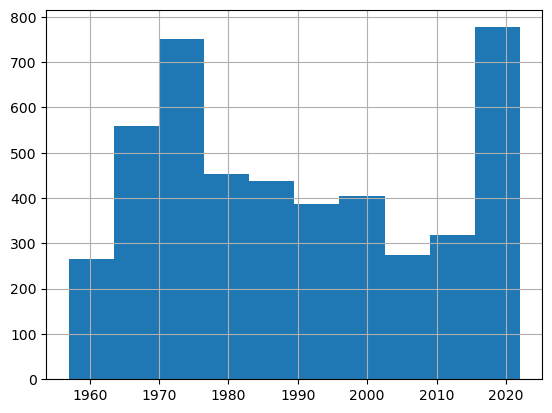

In [32]:
df['Year'].hist();

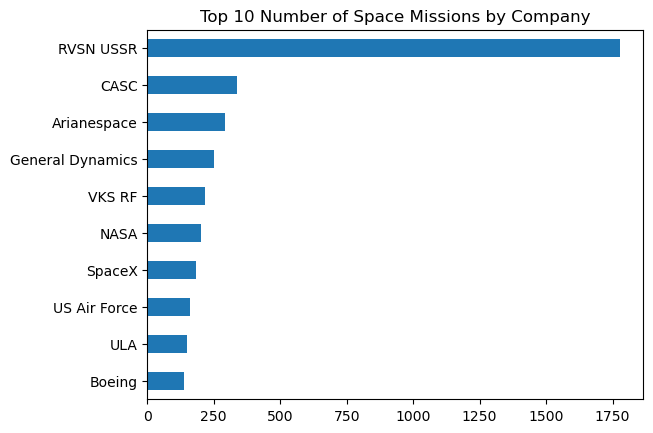

In [33]:
df['Company'].value_counts().nlargest(10).plot(kind='barh', title='Top 10 Number of Space Missions by Company')

plt.gca().invert_yaxis()

plt.show()

In [34]:
df['Country'].value_counts()

USA                            1467
Russia                         1416
Kazakhstan                      719
China                           364
France                          318
Japan                           130
India                            82
PacificOcean                     36
NewZealand                       28
Iran                             16
Israel                           11
Kenya                             9
Australia                         6
NorthKorea                        5
SouthKorea                        5
NewMexico                         4
YellowSea                         3
Brazil                            3
BarentsSea                        3
GranCanaria                       2
PacificMissileRangeFacility       1
ShahrudMissileTestSite            1
Name: Country, dtype: int64

*How many different launch sites are there?*

In [35]:
print('There are a total of', df['LaunchSite'].nunique(), 'different launch sites used across', 
     df['Country'].nunique(), 'countries/areas.')

There are a total of 48 different launch sites used across 22 countries/areas.


## Bivariate Analysis

*How have the number of rocket launches trended across time?*

In [36]:
df['Year'] = pd.to_datetime(df.Year, format='%Y')

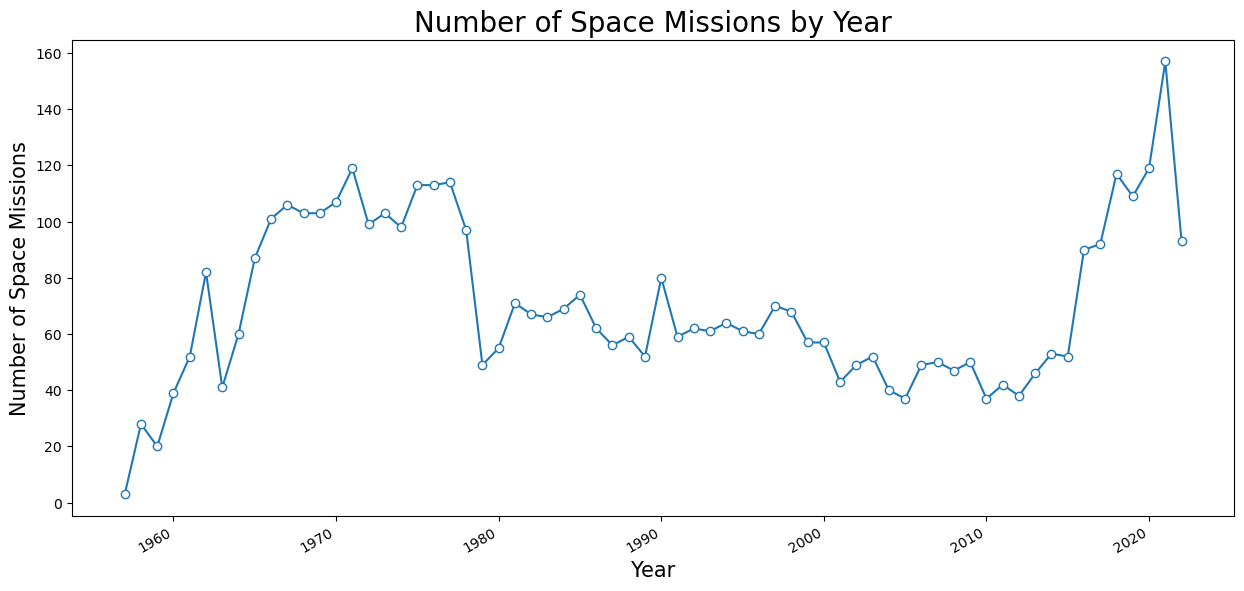

In [37]:
plt.subplots(figsize= (15,7))
df.Year.value_counts().plot(kind = 'line', marker='o', markerfacecolor='white', fillstyle='full');

plt.title('Number of Space Missions by Year', fontsize=20)
plt.ylabel('Number of Space Missions', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.show()

*Has mission success rate increased over time?*

In [38]:
df['MissionSuccess'] = df['MissionStatus'].map(dict(Success=1, Failure=0))
df.head()

,Company,Location,Country,LaunchSite,Year,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,MissionSuccess
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,BaikonurCosmodrome,1957-01-01,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1.0
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,BaikonurCosmodrome,1957-01-01,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1.0
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1957-01-01,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,0.0
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1958-01-01,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1.0
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,CapeCanaveralAFS,1958-01-01,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,0.0


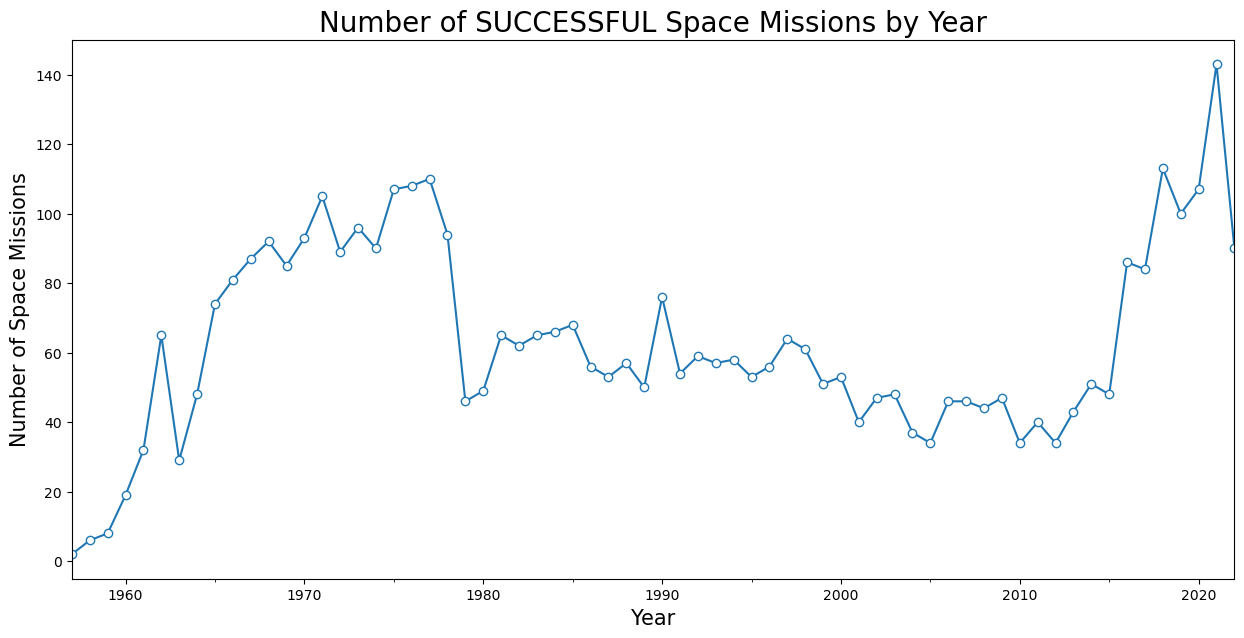

In [39]:
plt.subplots(figsize= (15,7))
df.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', marker='o', markerfacecolor='white', fillstyle='full');

plt.title('Number of SUCCESSFUL Space Missions by Year', fontsize=20)
plt.ylabel('Number of Space Missions', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.show()

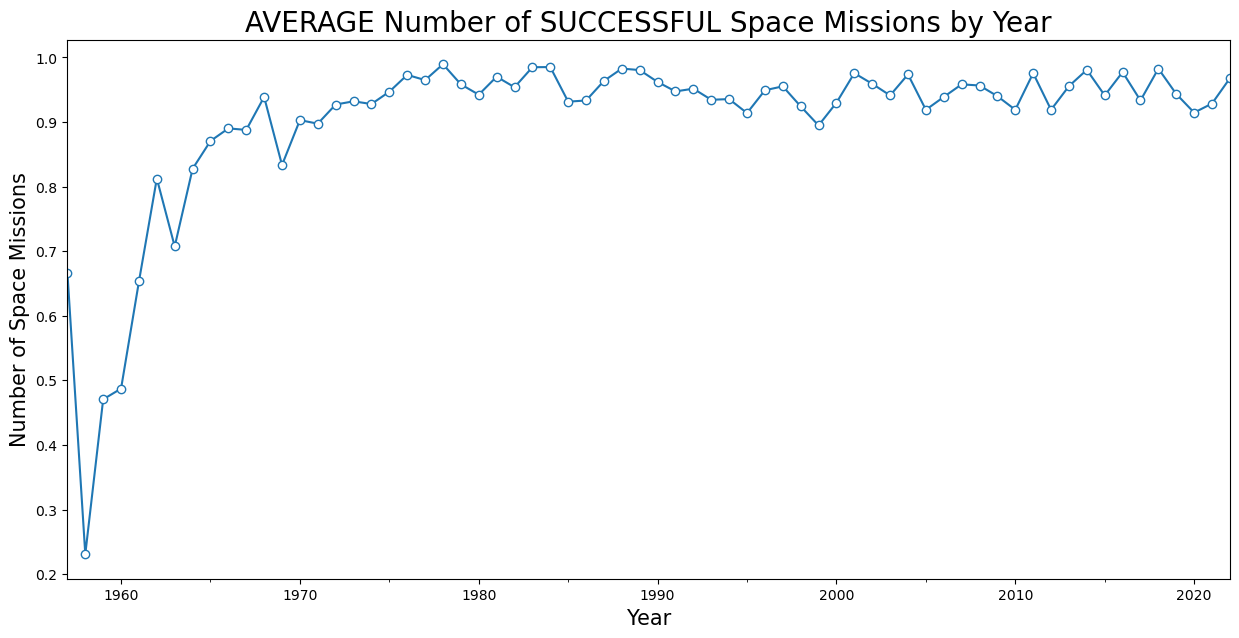

In [40]:
plt.subplots(figsize= (15,7))
df.groupby('Year')['MissionSuccess'].mean().plot(kind = 'line', marker='o', markerfacecolor='white', fillstyle='full');

plt.title('AVERAGE Number of SUCCESSFUL Space Missions by Year', fontsize=20)
plt.ylabel('Number of Space Missions', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.show()

In [41]:
print('On or before the year 1970, mission success rate was', 
      round(df.query('Year <= 1970')['MissionSuccess'].mean(), 3)*100, '%')

On or before the year 1970, mission success rate was 81.0 %


In [42]:
print('After the year 1970, mission success rate increased to', 
      round(df.query('Year > 1970')['MissionSuccess'].mean(), 3)*100, '%')

After the year 1970, mission success rate increased to 94.8 %


*Which countries have had the most successful space missions?*

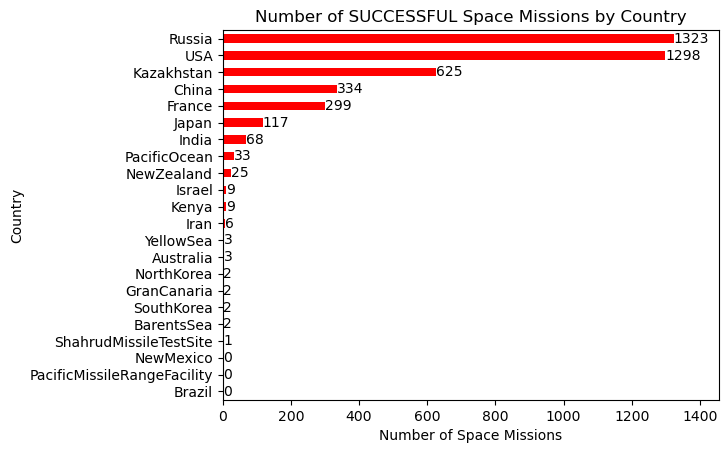

In [43]:
ax = df.groupby('Country')['MissionSuccess'].sum().sort_values(ascending=True).plot(kind='barh', color='red')

# setting title and axis labels
plt.title('Number of SUCCESSFUL Space Missions by Country')
plt.xlabel('Number of Space Missions')
plt.ylabel('Country')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(x=0.1)

plt.show()

*Has this always been the case?*

In [44]:
# Creating separate dataframes of mission success by the main Countries
Russia = df.loc[df['Country'] == 'Russia']
USA = df.loc[df['Country'] == 'USA']
Kazakhstan = df.loc[df['Country'] == 'Kazakhstan']
China = df.loc[df['Country'] == 'China']
France = df.loc[df['Country'] == 'France']
Japan = df.loc[df['Country'] == 'Japan']
India = df.loc[df['Country'] == 'India']

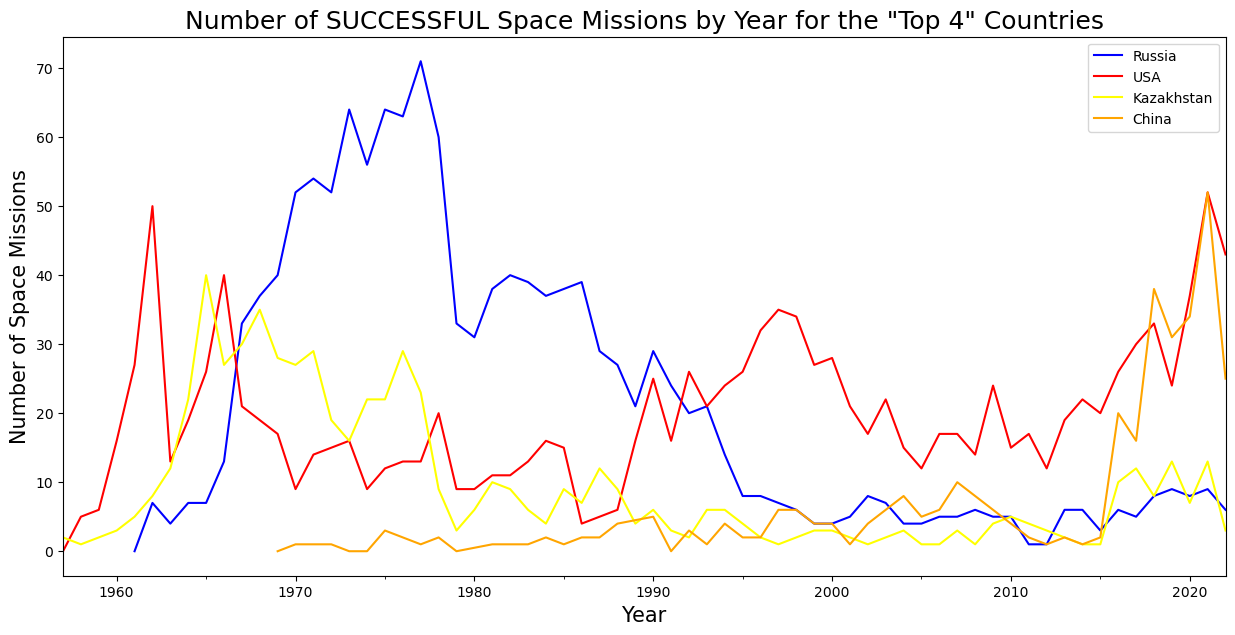

In [45]:
# Plot size
plt.subplots(figsize= (15,7))

# Plotting mission success by year for the top 3 Countries in our data
Russia.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='blue')
USA.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='red')
Kazakhstan.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='yellow')
China.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='orange')

# Assigning labels to the graph
labels1 = ['Russia', 'USA', 'Kazakhstan', 'China']
plt.legend(labels1)

# setting title and axis labels
plt.title('Number of SUCCESSFUL Space Missions by Year for the "Top 4" Countries', fontsize = 18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Space Missions', fontsize=15)


plt.show()

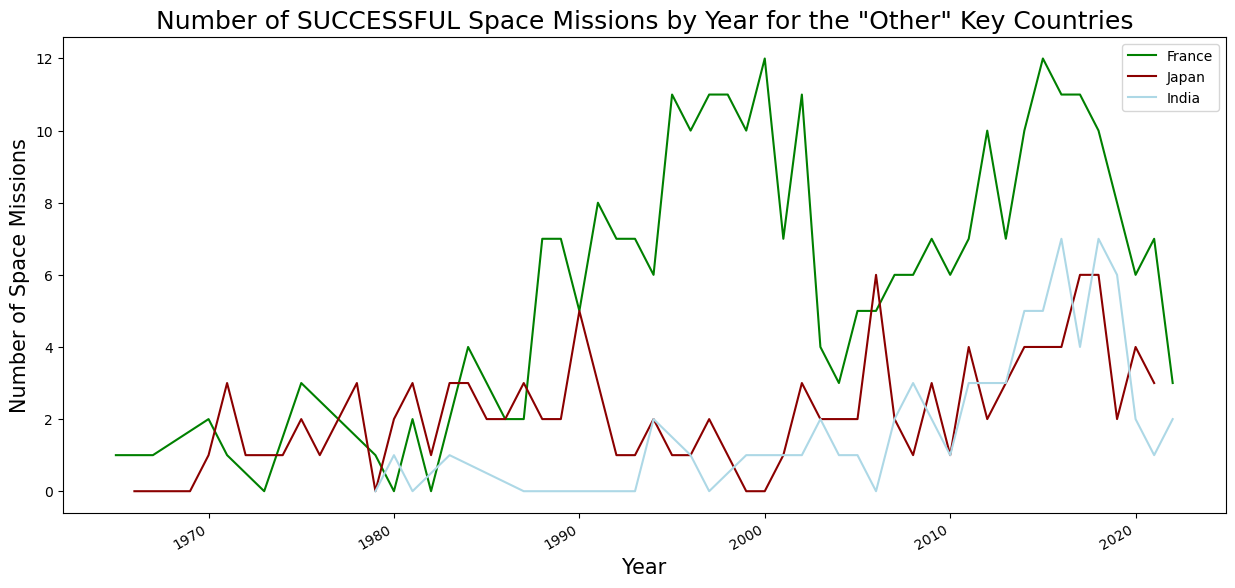

In [46]:
# Plot size
plt.subplots(figsize= (15,7))

# Plotting mission success by year for the top 3 Countries in our data
France.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='green')
Japan.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='darkred')
India.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='lightblue')


# Assigning labels to the graph
labels2 = ['France', 'Japan', 'India']
plt.legend(labels2)

# setting title and axis labels
plt.title('Number of SUCCESSFUL Space Missions by Year for the "Other" Key Countries', fontsize = 18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Space Missions', fontsize=15)

plt.show()

*How has Russia's space programme changed over time?*

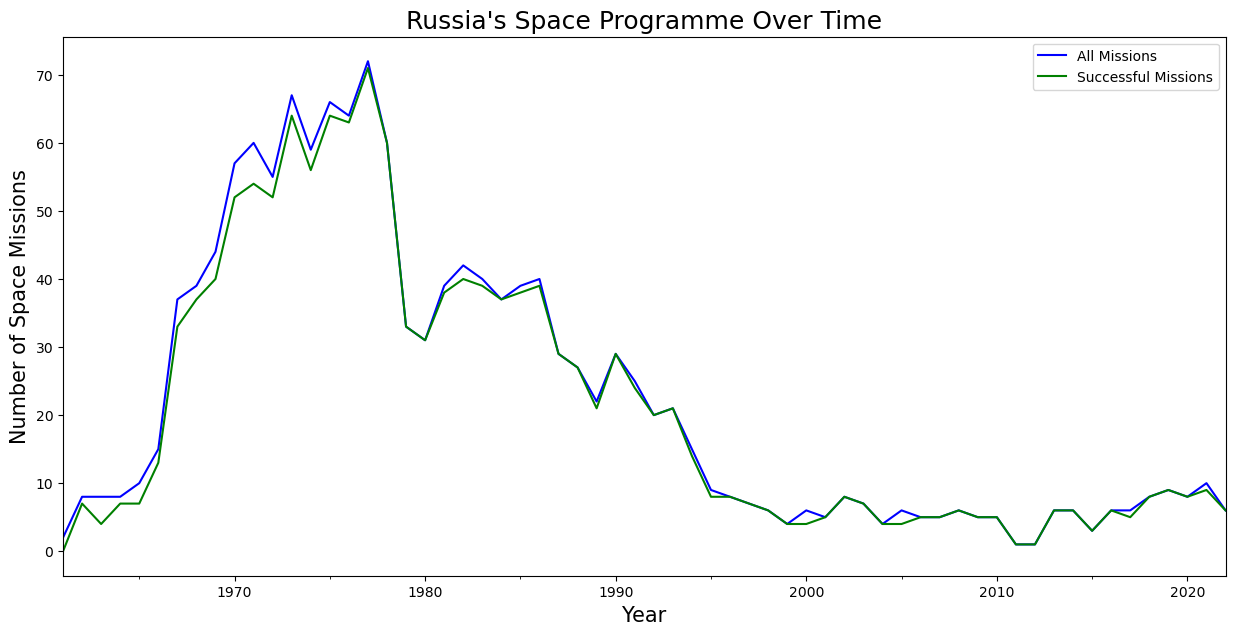

In [47]:
# Plot size
plt.subplots(figsize= (15,7))

# Plotting mission success by year for the top 3 Countries in our data
Russia.groupby('Year')['MissionSuccess'].count().plot(kind = 'line', color='blue')
Russia.groupby('Year')['MissionSuccess'].sum().plot(kind = 'line', color='green')

# Assigning labels to the graph
plt.legend(['All Missions', 'Successful Missions'])

# setting title and axis labels
plt.title("Russia's Space Programme Over Time", fontsize = 18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Space Missions', fontsize=15)


plt.show()

In [48]:
print(round(Russia.query('1964 < Year < 1991')['MissionSuccess'].sum()/len(
    Russia.loc[Russia['MissionStatus'] == 'Success']), 2)*100, "% of Russia's successful space missions \
were conducted over the 25 year period from 1965 to 1990")

81.0 % of Russia's successful space missions were conducted over the 25 year period from 1965 to 1990


# Insights and Conclusions 🕵️‍♂️

<div class="alert alert-block alert-info">
    
* The dataset has 4630 rows and 9 columns with 1 duplicated row, which was subsequently removed.
* Space missions range over a 65 year period from 1957 to 2022.
* There are 127 rows with missing values for Time, or 3.0% of our data. Likewise the percentage of rows with missing values for Price is 73.0%.
* We have a total of 4629 unique space missions within our data.
* A total of 370 different space rockets were used.
* The Cosmos-3M (11K65M) rocket has been used on the most number of occasions, with a total of 446 missions. This rocket is now Retired.
* 103 Space rockets are still Active as of August 2022, which is 27.8% of all rockets. 267 Space rockets are now Retired as of August 2022, which is 72.2% of all rockets.
* Mission success rate is 89.89% overall. The success rate increased significantly between 1958 and 1970, then generally levelled out.
* On or before the year 1970, mission success rate was 81.0%. After the year 1970, mission success rate increased to 94.8%.
* There are a total of 48 different launch sites used across 22 countries/areas.
* RVSN USSR is the Company with the highest number of space missions.
* Russia (1323) and USA (1298) have had the highest number of successful space missions
* The number of successful Russian space missions has declined since 1980 and has been overtaken by USA and China. In recent years Russia is closer to Kazakhstan in terms of successful missions.
* 81.0 % of Russia's successful space missions were conducted over the 25 year period from 1965 to 1990
    
</div>   